<a href="https://colab.research.google.com/github/Vshivaram/DataScienceEcosystem/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import yfinance as yf
import pandas as pd
tesla=yf.Ticker("TSLA")
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Use your provided static URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Step 1: Load HTML
html_data = requests.get(url).text

# Step 2: Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Find all tables
tables = soup.find_all("table")

# Step 4: Pick the Tesla Revenue Table (usually second table on that page)
tesla_revenue = pd.read_html(str(tables[1]))[0]  # [1] is index of Tesla table

# Step 5: Clean the data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

# Step 6: Preview
print(tesla_revenue.head())
print(tesla_revenue.tail())


         Date  Revenue
0  2022-09-30  21454.0
1  2022-06-30  16934.0
2  2022-03-31  18756.0
3  2021-12-31  17719.0
4  2021-09-30  13757.0
          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


In [28]:
# Get GameStop stock data
gamestop = yf.Ticker("GME")
gamestop_stock_data = gamestop.history(period="max")

# Display first few rows
gamestop_stock_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Download the page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# Step 2: Parse HTML
soup = BeautifulSoup(html_data_2, "html.parser")

# Step 3: Find all tables
tables = soup.find_all("table")

# Step 4: GameStop revenue is usually in the second table, index [1]
gamestop_revenue = pd.read_html(str(tables[1]))[0]

# Step 5: Clean the table
gamestop_revenue.columns = ["Date", "Revenue"]
gamestop_revenue.dropna(inplace=True)
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
gamestop_revenue = gamestop_revenue[gamestop_revenue["Revenue"] != ""]
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].astype(float)

# Step 6: Preview
print(gamestop_revenue.head())
print(gamestop_revenue.tail())


         Date  Revenue
0  2020-04-30   1021.0
1  2020-01-31   2194.0
2  2019-10-31   1439.0
3  2019-07-31   1286.0
4  2019-04-30   1548.0
          Date  Revenue
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0


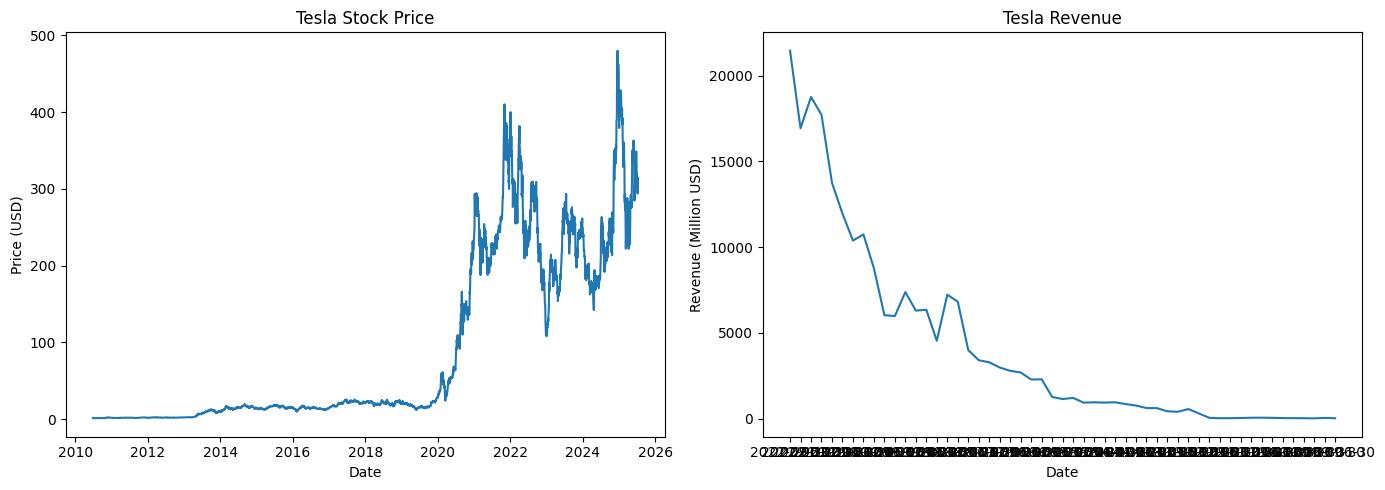

In [45]:
import matplotlib.pyplot as plt

# Merge Tesla stock and revenue data (optional: truncate to match dates)
tesla_data.reset_index(inplace=True)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(tesla_data['Date'], tesla_data['Close'])
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

plt.subplot(1, 2, 2)
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'])
plt.title("Tesla Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (Million USD)")

plt.tight_layout()
plt.show()


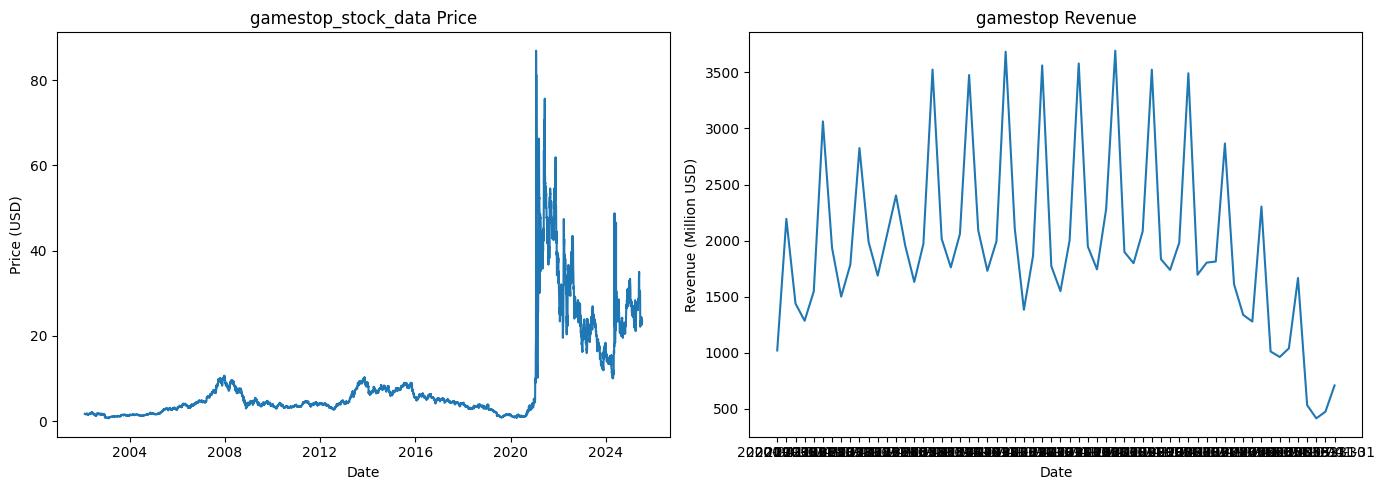

In [48]:
import matplotlib.pyplot as plt

# Merge Tesla stock and revenue data (optional: truncate to match dates)
gamestop_stock_data.reset_index(inplace=True)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(gamestop_stock_data['Date'], gamestop_stock_data['Close'])
plt.title("gamestop_stock_data Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

plt.subplot(1, 2, 2)
plt.plot(gamestop_revenue['Date'], gamestop_revenue['Revenue'])
plt.title("gamestop Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue (Million USD)")

plt.tight_layout()
plt.show()
